# TASK 5: Sales Prediction Using Python By Shabareesh Nair At Oasis InfoByte

# Importing Libraries and Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\H P\Downloads\archive (10)\Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Exploring the Dataset

In [4]:
# Dropping Unnamed Column from the dataset

df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.duplicated().sum()

0

# Visualizing the Dataset Properly

In [140]:
X_plot = df[['TV']]
y_plot = df['Sales']

fig = px.scatter(df, x = X_plot['TV'], y = y_plot, title='Linear Regression',
                 template = 'plotly_dark')

fig.add_traces(px.scatter(x = X_plot['TV'], y = y_plot, trendline = 'ols').data)
fig.show()

# Visualization of a Bar plot on the basis of Radio by Sales

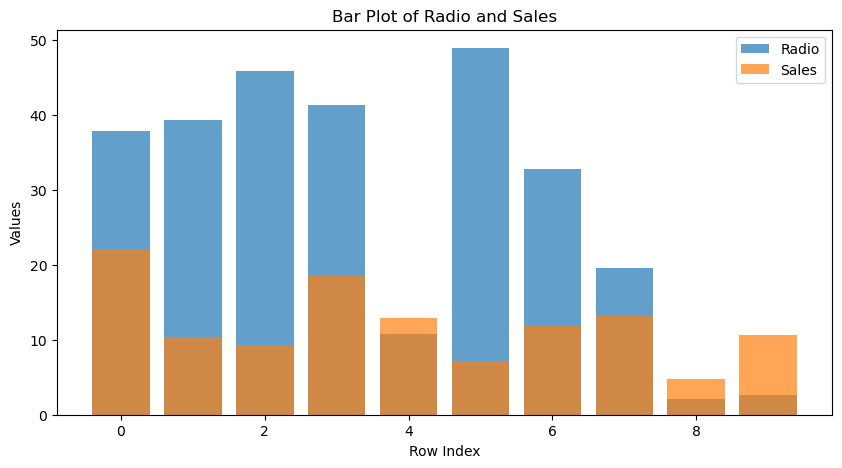

In [26]:
# Selecting the first 20 rows
df_subset = df.head(10)

plt.figure(figsize = (10, 5))
plt.bar(df_subset.index, df_subset['Radio'], label = 'Radio', alpha = 0.7)
plt.bar(df_subset.index, df_subset['Sales'], label = 'Sales', alpha = 0.7)
plt.xlabel('Row Index')
plt.ylabel('Values')
plt.title('Bar Plot of Radio and Sales')
plt.legend()
plt.show()

# Visualization of Pair plot on Dataset

<Figure size 1200x600 with 0 Axes>

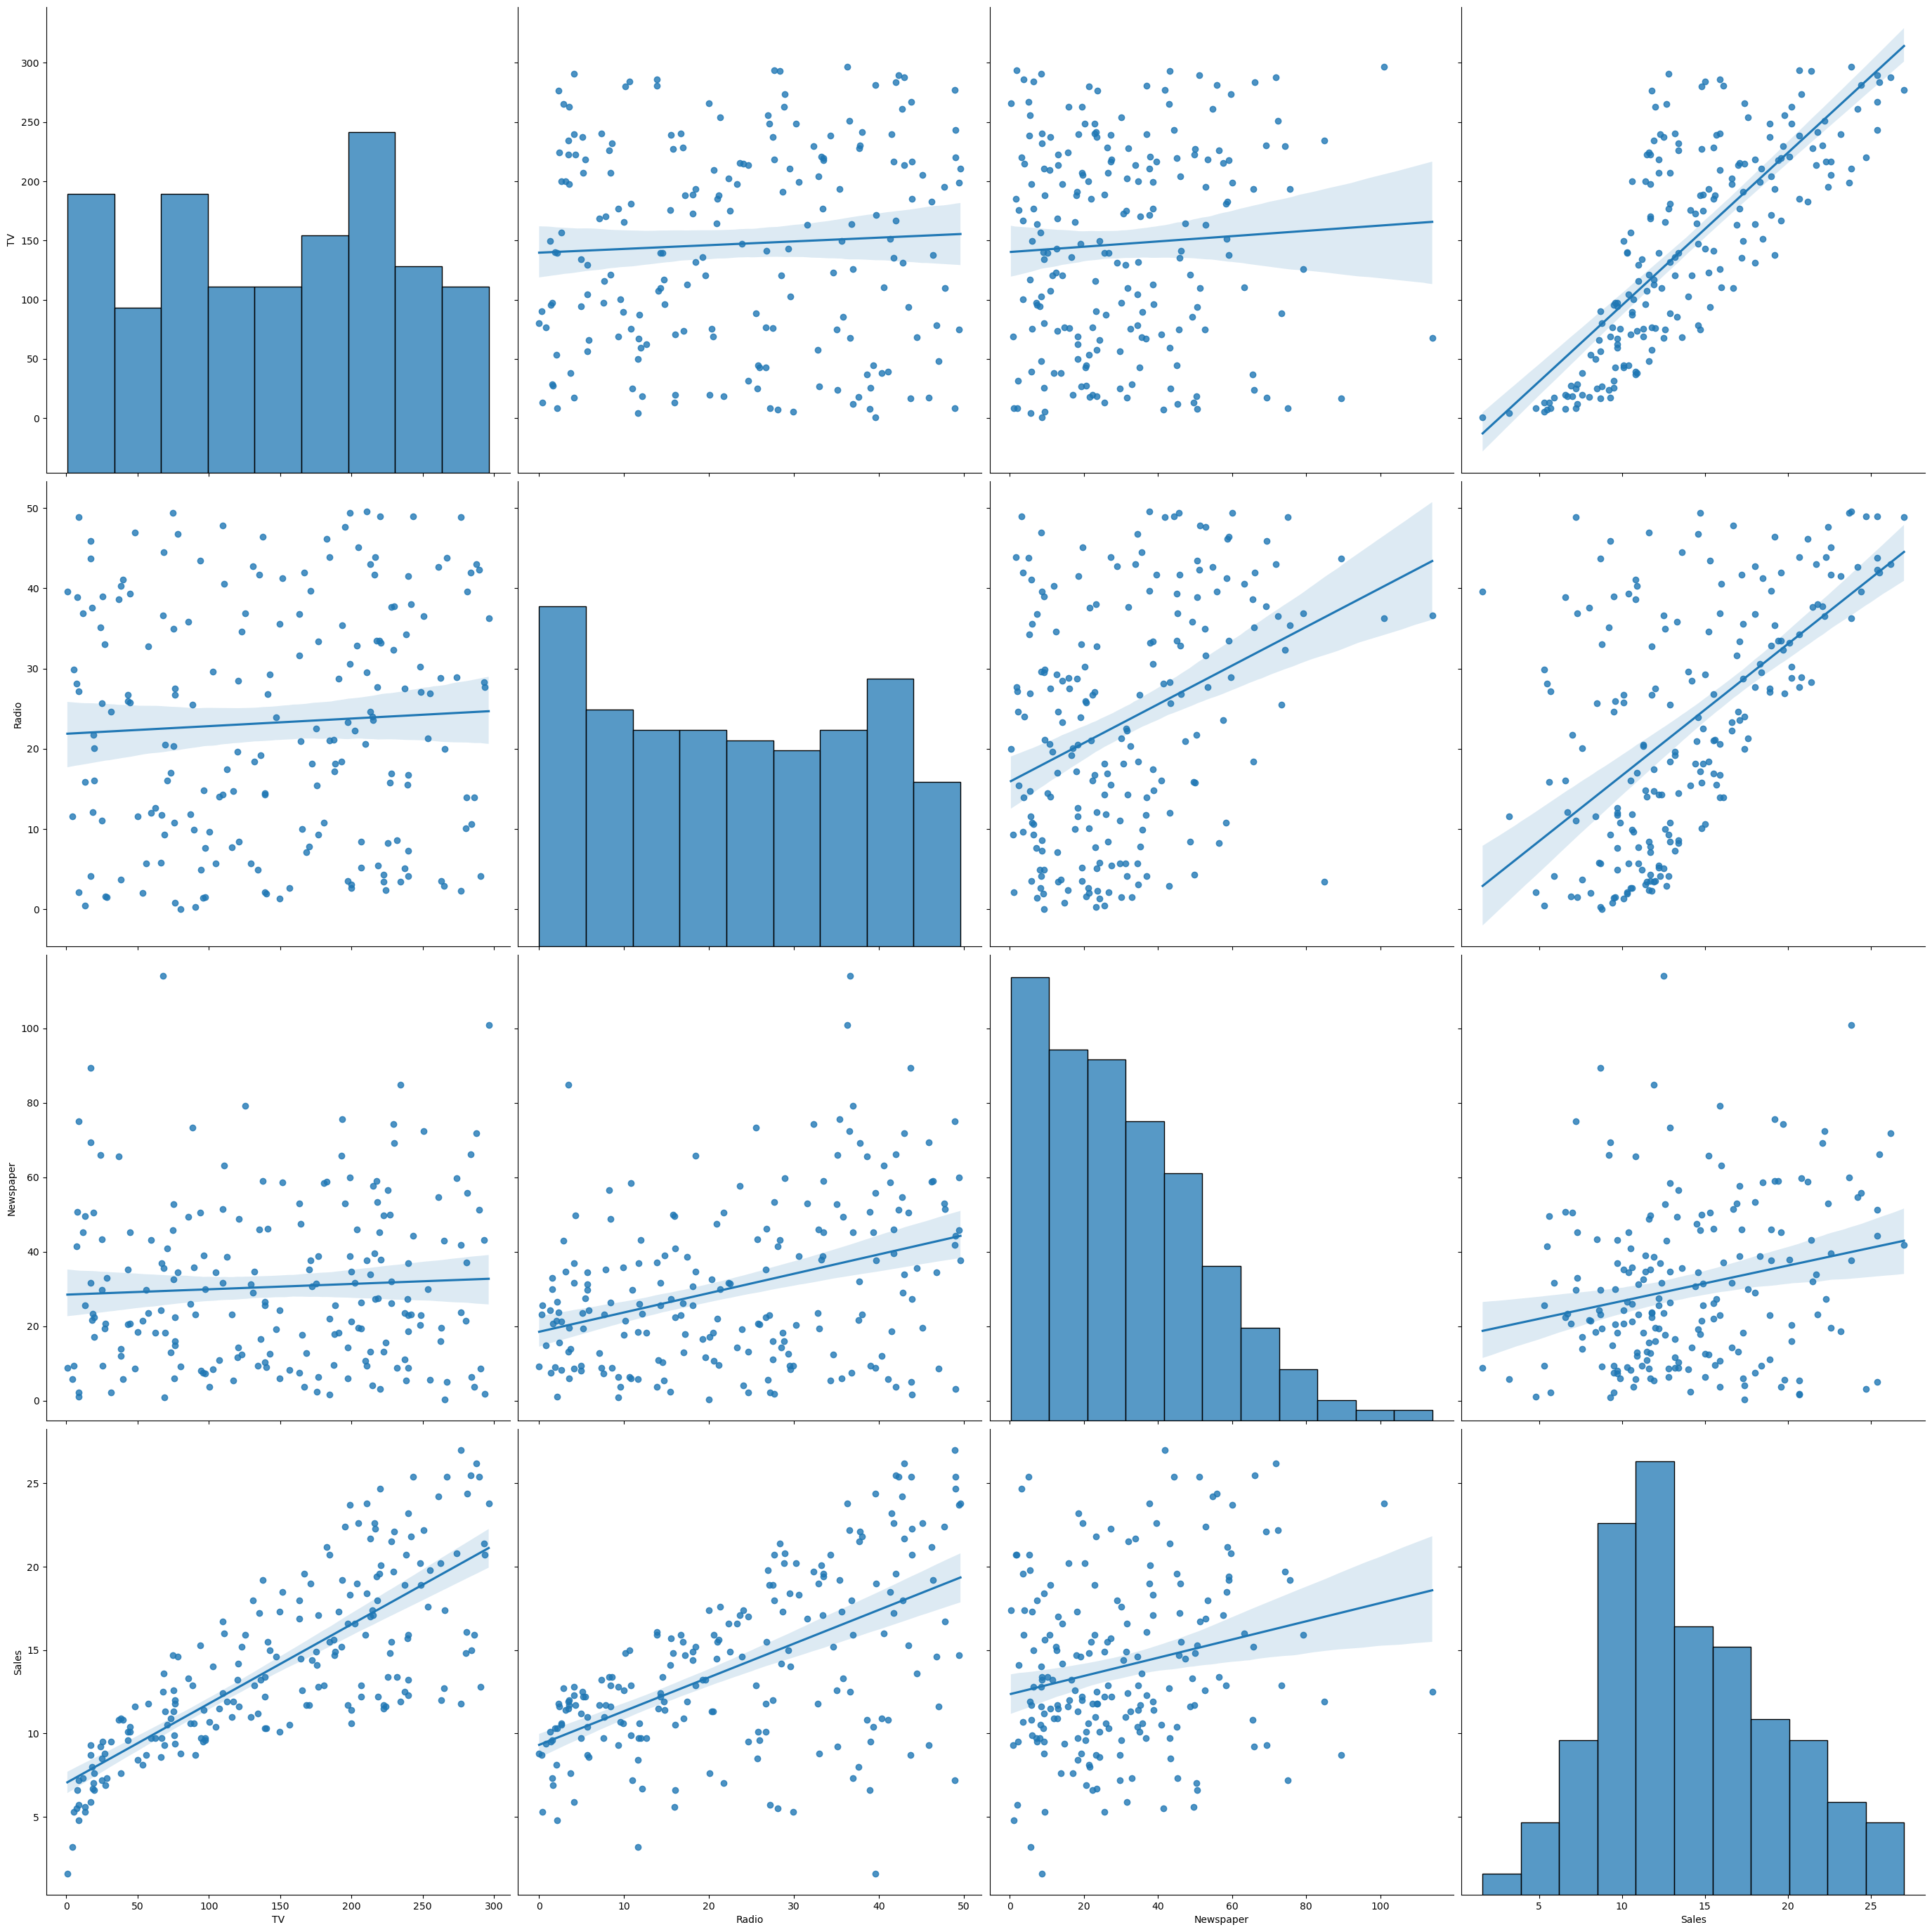

In [62]:
plt.figure(figsize = (12, 6))
sns.pairplot(data = df, kind = 'reg', height = 7)
plt.show()

# Separating Features and Target Columns

In [127]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [128]:
print(X[:10])

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]]


In [129]:
print(y[:10])

[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6]


# Splitting into Training and Testing Set

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [131]:
print(len(X_train))

160


In [132]:
print(len(X_test))

40


# Feature Scaling

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [134]:
print(X_train[:10])

[[-0.37397109  0.34745302 -0.75141582]
 [ 0.89741087  0.97996705  0.08574424]
 [-1.59568044 -1.33008419  0.06693165]
 [-1.51762351  0.80121309  1.68011086]
 [ 1.47337646 -1.45383694 -0.30461691]
 [ 0.64668252 -1.25445752 -0.50685221]
 [ 0.24102297 -0.36756284  0.02460333]
 [ 0.3876754  -0.16818342 -0.3845704 ]
 [ 0.33918549 -0.86944898  1.32737489]
 [ 0.80043103  0.69121065  0.70185641]]


In [135]:
print(X_test[:10])

[[-0.61345708 -0.35026014 -0.81821769]
 [ 1.77917507  1.07988968  1.01356516]
 [-1.16330236  1.0419211  -0.97193373]
 [-1.00341011  1.17481113 -1.12137988]
 [-0.53523641 -1.42603656 -0.97620362]
 [-0.35693931 -1.33744321 -1.05306164]
 [-0.04175603  0.76348485 -0.83956714]
 [ 0.7899137   1.5924655   0.88973834]
 [-0.66176985 -0.12877677 -0.58764362]
 [-1.30594004 -0.41986921  0.74883197]]


# Training the model with Linear Regression Algorithm

In [136]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predicting Training and Merging with Actual Training Set

In [137]:
y_train_pred = model.predict(X_train)

train_result = pd.DataFrame({
    'Actual Train' : y_train,
    'Predicted Train' : y_train_pred
})

train_result.head(20)

,Actual Train,Predicted Train
0,14.2,13.777108
1,21.5,20.479466
2,5.9,4.213351
3,9.2,10.514994
4,11.8,15.799856
5,12.2,13.165993
6,14.4,14.092772
7,15.5,15.249509
8,12.9,12.983707
9,19.6,19.251434


# Predicting Testing Result and Merging with Actual Testing Set

In [138]:
y_test_pred = model.predict(X_test)

test_result = pd.DataFrame({
    'Actual Train' : y_test,
    'Predicted Train' : y_test_pred
})

test_result.head(20)

,Actual Train,Predicted Train
0,10.9,10.861789
1,24.4,24.146533
2,9.5,12.699968
3,10.8,13.706660
4,8.8,8.107562
5,9.5,9.056168
6,15.2,16.257166
7,22.4,21.769982
8,11.3,11.294557
9,5.6,7.900944


# Making R2 score and Mean Sqaured Error

In [139]:
from sklearn.metrics import mean_squared_error, r2_score

print('R2 Score and MSE of Testing Set:')
mse_train = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error of Training Set:\n', mse_train)
r2_train = r2_score(y_train, y_train_pred)
print('The R2 Score for Training Set:\n', r2_train)

print()

print('R2 Score and MSE of Testing Set:')
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error of Testing Set:\n', mse_test)
r2_test = r2_score(y_test, y_test_pred)
print('The R2 Score for Testing Set:\n', r2_test)

R2 Score and MSE of Testing Set:
Mean Squared Error of Training Set:
 2.793518489948613
The R2 Score for Training Set:
 0.8921482853795542

R2 Score and MSE of Testing Set:
Mean Squared Error of Testing Set:
 3.34409256374033
The R2 Score for Testing Set:
 0.892668567769957
